In [1]:
import sys
sys.path.append('..')

from src.var_like import VarLikeModel

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt

import IPython.display as display

import warnings
warnings.filterwarnings("ignore")

In [3]:
time_serires_data = pd.read_excel('../data/Learning_data_part4.xlsx')

In [4]:
time_series_num = 20

test_series = time_serires_data.iloc[:, time_series_num].values

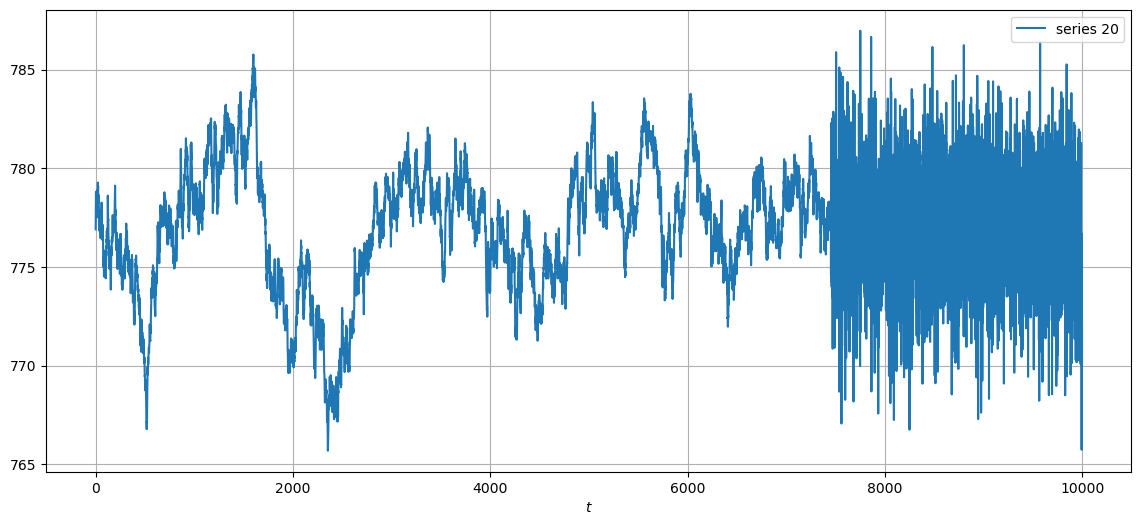

In [5]:
# plot series
fig, ax = plt.subplots(figsize=(14, 6))

for indx in [time_series_num]:
    ax.plot(test_series, label=f'series {indx}')

ax.legend()
ax.grid(True)
ax.set_xlabel('$t$');

In [6]:
# transfrom series shape
test_series = test_series.reshape((-1, 1))

In [7]:
# pca model
pca_model = VarLikeModel(test_series)

window_size = 50

discord_scores = pca_model.find_discord(window_size)

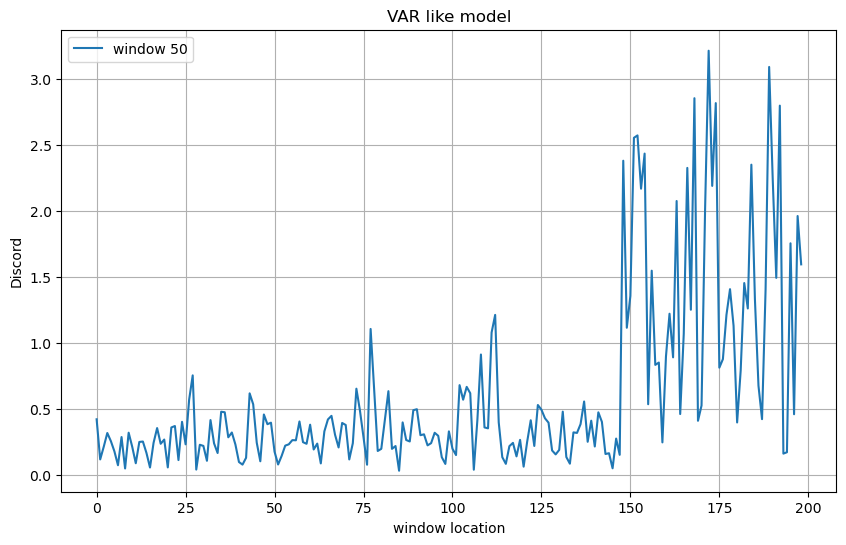

In [8]:
# plot discord function
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(discord_scores, label=f'window {window_size}')
    
ax.legend()
ax.grid(True)
ax.set_xlabel('window location');
ax.set_ylabel('Discord');
ax.set_title('VAR like model');

In [19]:
discord_point = -1

for i in range(5, len(discord_scores)):
    left_mean = np.mean(discord_scores[:i])
    left_std = np.std(discord_scores[:i])

    closest_max = np.max(discord_scores[i:i + 5])

    # we found some vicinity of discord point
    if (np.abs(left_mean - closest_max) > 6 * left_std):
        discord_point = (i - 10) + np.argmax(discord_scores[i - 10: i + 10 + 1])
        break

In [20]:
discord_scores[discord_point]

2.5743663770438094

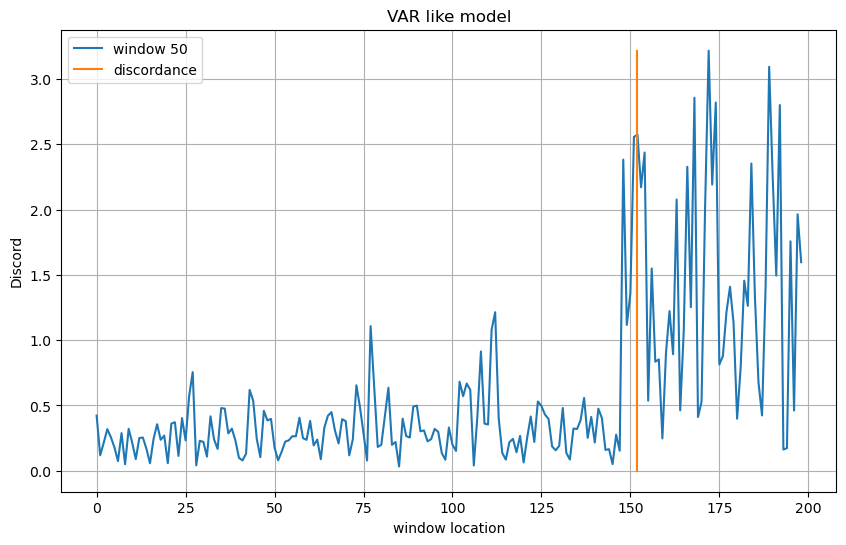

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(discord_scores, label=f'window {window_size}')

ax.plot([discord_point] * 2, [0, np.max(discord_scores)], label='discordance')

ax.legend()
ax.grid(True)
ax.set_xlabel('window location');
ax.set_ylabel('Discord');
ax.set_title('VAR like model');

In [22]:
# discord point in scale of time series
discord_point_ts = (window_size - 1) + discord_point  * window_size

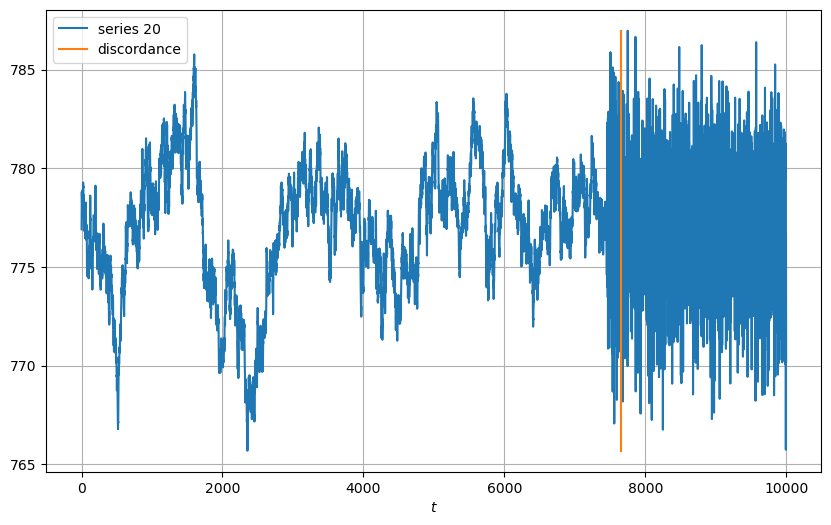

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(test_series, label=f'series {indx}')

ax.plot([discord_point_ts] * 2, [np.min(test_series), np.max(test_series)], label='discordance')

ax.legend()
ax.grid(True)
ax.set_xlabel('$t$');